In [41]:
# !pip install gglasso

In [42]:
# !pip install decorator==5.0.9

In [43]:
from gglasso.helper.data_generation import generate_precision_matrix, group_power_network, sample_covariance_matrix
from gglasso.problem import glasso_problem
from gglasso.helper.basic_linalg import adjacency_matrix

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import pandas as pd


In [44]:
# p = 20
# N = 1000

# Sigma, Theta = generate_precision_matrix(p=p, M=1, style='erdos', prob=0.1, seed=1234)

# S, sample = sample_covariance_matrix(Sigma, N)

# print("Shape of empirical covariance matrix: ", S.shape)
# print("Shape of the sample array: ", sample.shape)

In [45]:
diabetes = pd.read_csv("/Users/pushpamahendra/Praxis Business School-Pushpa’s MacBook Air/Dataset/diabetes.csv")

In [46]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
X = diabetes.drop(['Outcome'],axis=1)

In [48]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [49]:
# X= preprocessing.scale(X)

In [50]:
np.cov(X).shape

(768, 768)

In [51]:
Sigma = np.cov(X.T)
Sigma.shape

(8, 8)

In [52]:
N = X.shape[0]

In [53]:
Theta = np.linalg.inv(Sigma)
Theta,Theta.shape

(array([[ 1.26022990e-01, -7.48586412e-05, -3.24618183e-04,
         -7.62501857e-05,  1.77985559e-04, -4.08853920e-04,
          5.85031447e-02, -1.94573718e-02],
        [-7.48586412e-05,  1.27069077e-03, -8.89899752e-05,
          4.24727247e-04, -1.27677143e-04, -9.53392314e-04,
         -8.02599196e-03, -8.19926421e-04],
        [-3.24618183e-04, -8.89899752e-05,  3.15460179e-03,
         -6.39201974e-04,  1.27964853e-05, -1.59514620e-03,
          5.05547984e-03, -1.18881435e-03],
        [-7.62501857e-05,  4.24727247e-04, -6.39201974e-04,
          5.92373578e-03, -3.22074182e-04, -3.61147186e-03,
         -2.47683894e-02,  8.53480770e-04],
        [ 1.77985559e-04, -1.27677143e-04,  1.27964853e-05,
         -3.22074182e-04,  1.07485601e-04,  6.17582798e-05,
         -2.61638554e-03,  5.42581571e-05],
        [-4.08853920e-04, -9.53392314e-04, -1.59514620e-03,
         -3.61147186e-03,  6.17582798e-05,  2.08727505e-02,
         -2.59389315e-02,  3.60236128e-04],
        [ 5.8503

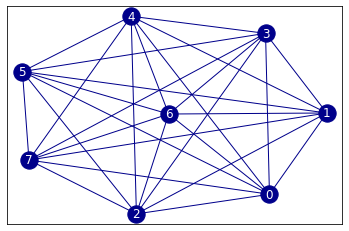

In [54]:
A = adjacency_matrix(Theta)

G = nx.from_numpy_array(A)
pos = nx.drawing.layout.spring_layout(G)

plt.figure()
nx.draw_networkx(G, pos = pos, node_color = "darkblue", edge_color = "darkblue", font_color = 'white', with_labels = True)

In [55]:
A

array([[0, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0]])

In [56]:
S, sample = sample_covariance_matrix(Sigma, N)

In [57]:
S.shape

(8, 8)

In [69]:
P = glasso_problem(Sigma, N, reg_params = {'lambda1': 0.6210169418915615}, latent = False, do_scaling = False)
print(P)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.6210169418915615, 'mu1': None}


In [70]:
lambda1_range = np.logspace(0, -3, 30)
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.1)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)

ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 1000 iterations with status: max iterations reached.
ADMM terminated after 533 iterations with status: optimal.
ADMM terminated after 907 iterations with status: optimal.
ADMM terminated after 266 iterations with status: optimal.
ADMM terminated after 325 iterations with status: optimal.
ADMM terminated after 458 iterations with status: optimal.
ADMM terminated after 368 iterations with status: optimal.
ADMM terminated after 553 iterations with status: optimal.
ADMM terminated after 448 iterations with status: optimal.
ADMM terminated after 207 iterations with status: optimal.
ADMM terminated after 161 iterations with status: optimal.
ADMM terminated after 78 iterations with status: optimal.
ADMM terminated after 189 iterations with status: optimal.
ADMM terminated after 379 iterations with status: optimal.
ADMM term

Text(0.5, 1.0, 'Recovered precision matrix')

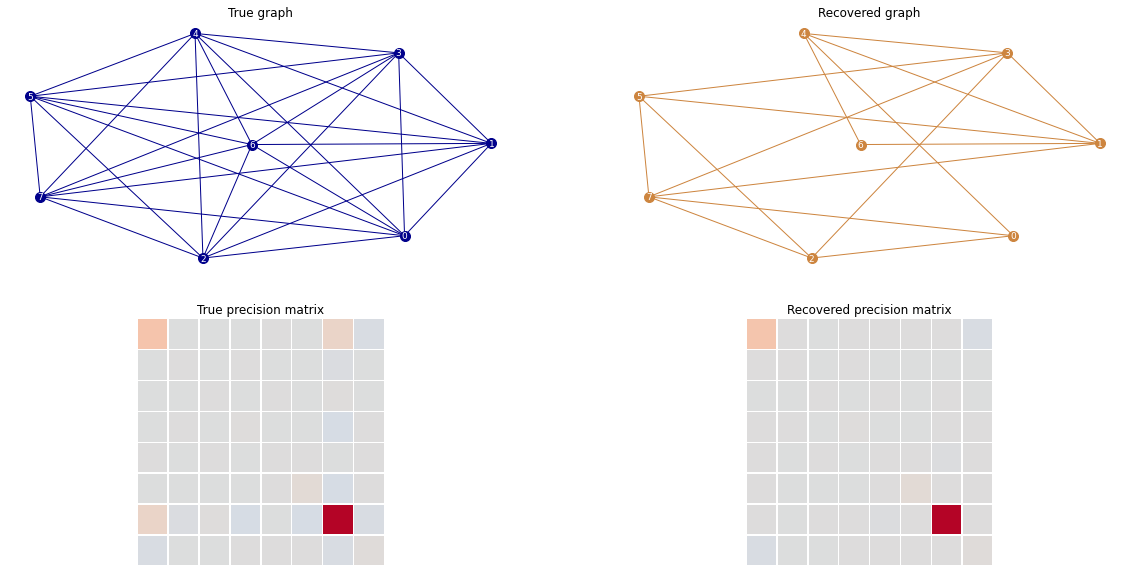

In [71]:
#tmp = P.modelselect_stats
sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2,2, figsize=(20,10))
node_size = 100
font_size = 9

nx.draw_networkx(G, pos = pos, node_size = node_size, node_color = "darkblue", edge_color = "darkblue", \
                 font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0,0])
axs[0,0].axis('off')
axs[0,0].set_title("True graph")

G1 = nx.from_numpy_array(P.solution.adjacency_)
nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0,1])
axs[0,1].axis('off')
axs[0,1].set_title("Recovered graph")

sns.heatmap(Theta, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,0])
axs[1,0].set_title("True precision matrix")

sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,1])
axs[1,1].set_title("Recovered precision matrix")

In [39]:
# Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
#       dtype='object')

In [72]:
P.solution.calc_adjacency(t = 1e-4)